In [1]:
import numpy as np
import h5py 
import os
# plotting
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
def equalize(ax):
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))

In [3]:
colors = [
    '#377eb8', '#ff7f00', '#4daf4a', 
    '#f781bf', '#a65628', '#984ea3', 
    '#999999', '#e41a1c', '#dede00',
    '#595959', '#5F9ED1', '#C85200',
    '#A2C8EC', '#FFBC79', '#000000'
]

In [4]:
base = 'results/exp3'
Ls = np.array([0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
selection_thresholds = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
sparsities = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
files = {}
for sparsity in sparsities:
    files[sparsity] = h5py.File(os.path.join(base, 'uoicorr%0.1f.h5' %sparsity), 'r')
    
n_features = 50

# ROC

In [7]:
def plot_roc(sparsity, Ls, scaled=False, ax=None, showlegend=False):
    # extract files
    file = files[sparsity]
    fps = file['fp'][:]
    fns = file['fn'][:]
    # max fp/fn for scaling
    max_fp = int(n_features * (1 - sparsity))
    max_fn = int(n_features * sparsity)
    # set up figure
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    for idx, L in enumerate(Ls):
        fp_mean = np.mean(fps[:, idx, :], axis=0)
        fn_mean = np.mean(fns[:, idx, :], axis=0)
        if scaled:
            fp_mean /= max_fp
            fn_mean /= max_fn
        ax.plot(fp_mean, fn_mean, color=colors[idx], linewidth=3, marker='o', markersize=10, label=r'$L=%0.1f$' %L)
    if showlegend:
        lgd = ax.legend(
            loc='center right', 
            bbox_to_anchor=(1.3, 0.5),
            prop={'size' : 20}
        )
        lgd.get_frame().set_edgecolor('black')
    return ax

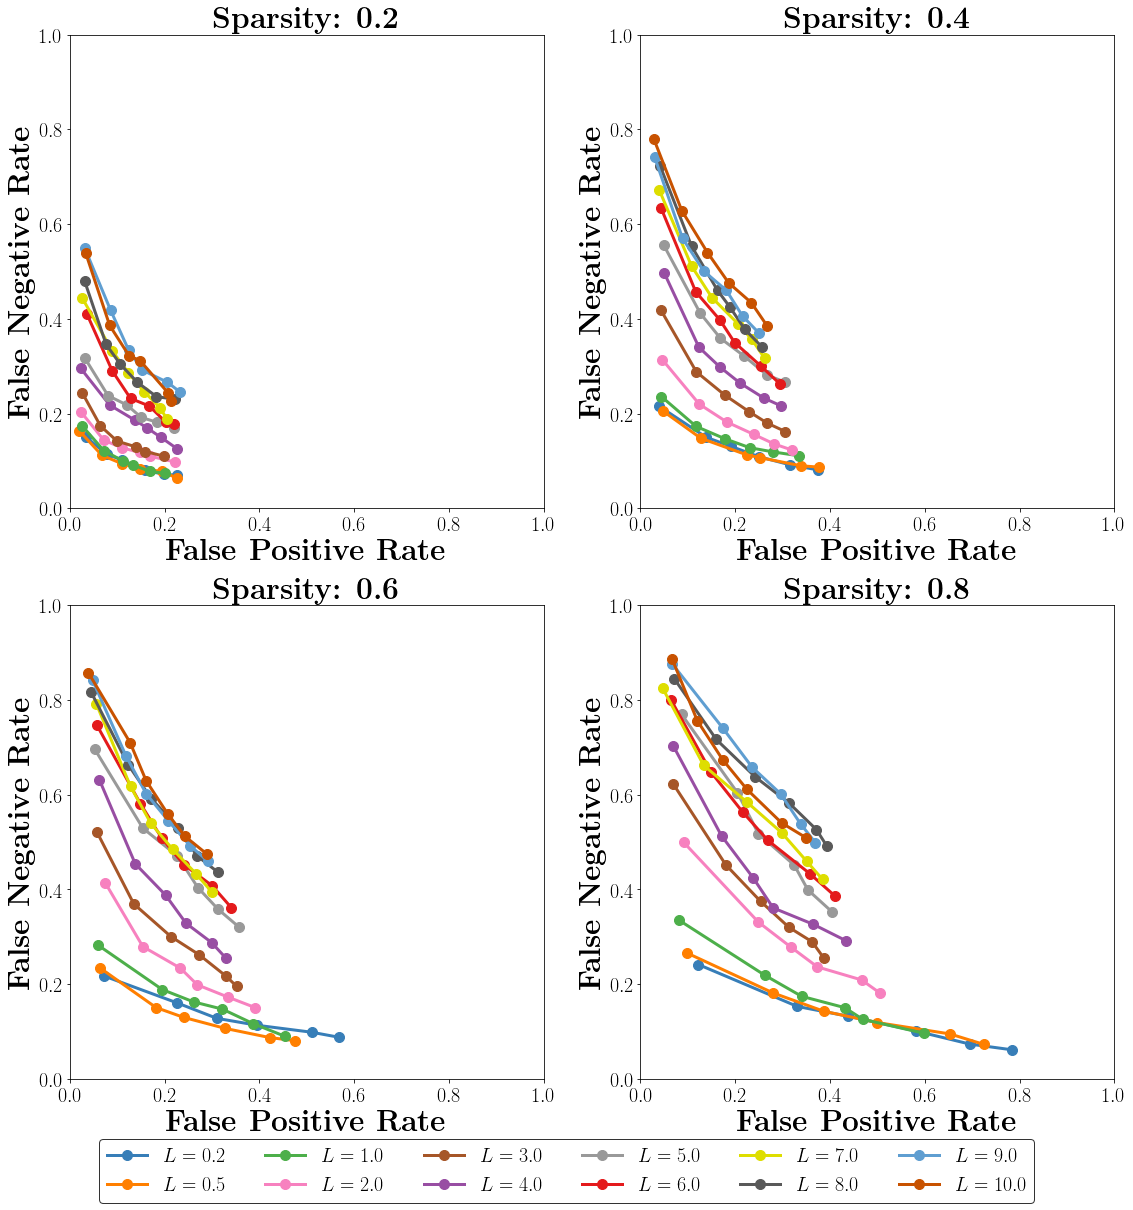

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
plot_roc(0.2, Ls=Ls, scaled=True, ax=axes[0,0])
axes[0,0].set_title(r'\textbf{Sparsity: 0.2}')
plot_roc(0.4, Ls=Ls, scaled=True, ax=axes[0,1])
axes[0,1].set_title(r'\textbf{Sparsity: 0.4}')
plot_roc(0.6, Ls=Ls, scaled=True, ax=axes[1,0])
axes[1,0].set_title(r'\textbf{Sparsity: 0.6}')
plot_roc(0.8, Ls=Ls, scaled=True, ax=axes[1,1])
axes[1,1].set_title(r'\textbf{Sparsity: 0.8}')
ax_list = axes.ravel()
for ax in ax_list:
    ax.set_xlim([0., 1.0])
    ax.set_ylim([0., 1.0])
    ax.set_xlabel(r'\textbf{False Positive Rate}')
    ax.set_ylabel(r'\textbf{False Negative Rate}')
    equalize(ax)
handles, labels = axes[1,1].get_legend_handles_labels()
lgd = fig.legend(
    handles, 
    labels, 
    loc='center',
    bbox_to_anchor=(0.5, -0.02),
    ncol=6,
    prop={'size' : 20},
    bbox_transform=fig.transFigure
)
lgd.get_frame().set_edgecolor('black')
plt.tight_layout()
#plt.savefig('exp2_roc.pdf', bbox_inches='tight')

In [18]:
def plot_fpfn(sparsity, scaled=False, Ls=np.array([0.25, 1.0, 3.0, 5.0, 7.0, 10.0])):
    # extract files
    file = files[sparsity]
    fps = file['fp'][:]
    fns = file['fn'][:]
    # max fp/fn for scaling
    max_fp = int(n_features * (1 - sparsity))
    max_fn = int(n_features * sparsity)
    # set up figure
    fig, axes = plt.subplots(1, 2, figsize=(24, 8))
    fp = axes[0]
    fn = axes[1]
    for idx, L in enumerate(Ls):
        fp_mean = np.mean(fps[:, idx, :], axis=0)
        fn_mean = np.mean(fns[:, idx, :], axis=0)
        if scaled:
            fp_mean /= max_fp
            fn_mean /= max_fn
        fp.plot(selection_thresholds, fp_mean, color=colors[idx], linewidth=3, marker='o', markersize=10)
        fn.plot(selection_thresholds, fn_mean, color=colors[idx], linewidth=3, marker='o', markersize=10, label='$L=%0.1f$' %L)

    fp.set_xlabel(r'\textbf{Lower Selection Threshold}')
    fn.set_xlabel(r'\textbf{Lower Selection Threshold}')
    fp.set_ylabel(r'\textbf{Fraction of Maximum}')
    fn.set_ylabel(r'\textbf{Fraction of Maximum}')
    fp.set_title(r'\textbf{False Positives}')
    fn.set_title(r'\textbf{False Negatives}')
    #fp.set_ylim([0, 1])
    #fn.set_ylim([0, 1])
    # set up legend outside plot
    lgd = fn.legend(
        loc='center right', 
        bbox_to_anchor=(1.3, 0.5),
        prop={'size' : 25}
    )
    lgd.get_frame().set_edgecolor('black')
    plt.tight_layout()

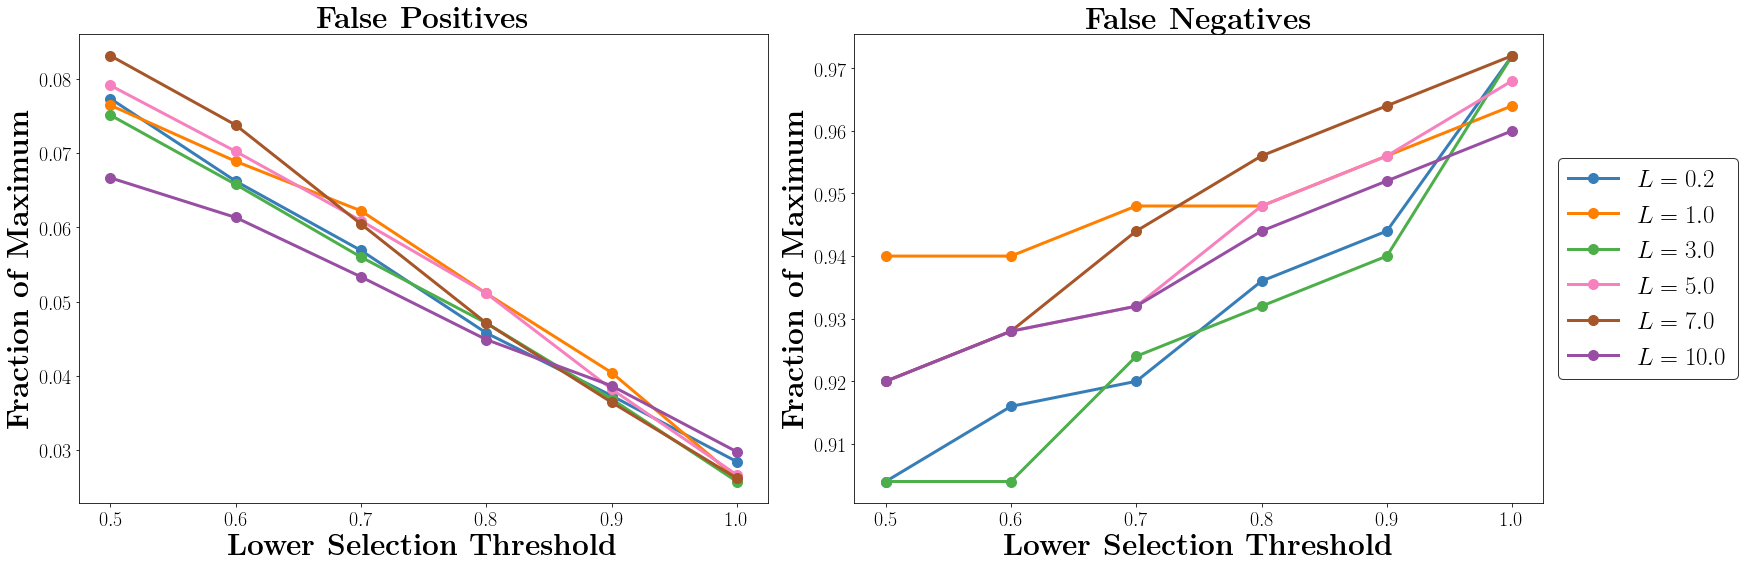

In [21]:
plot_fpfn(0.1, scaled=True)